In [2]:
import numpy as np
from netCDF4 import Dataset as open_ncfile
import sys
sys.path.append('/home/ysilvy/Density_bining/Yona_analysis/programs/')
#sys.path.append('/Users/Yona 1/Documents/Thèse/Density_bining/Yona_analysis/programs/') # From local
import matplotlib.pyplot as plt
from maps_matplot_lib import defVarmme, zonal_2D, custom_div_cmap
from functions import lag_linregress_3D

In [3]:
# ===== Workspace =====

file = '/home/ericglod/Density_bining/test/EN4.mon.ocean.Omon.1900_2017.density_v2.nc'
f = open_ncfile(file, 'r')

varname = defVarmme('salinity'); v = 'S'
density = f.variables['lev'][:]
var = varname['var_zonal_w/bowl']

# Choose period for trend calculation
#yend = 2000
yend = 2017
# yend = 2008

In [4]:
# ===== Read variables =====
# xarray version
import xarray as xr
f = xr.open_dataset(file)
time_all = np.arange(1900,2018)
f['time'] = time_all

vart = f.isonso.sel(time=slice(1950,yend))
bowl = f.ptopsigma.sel(time=slice(1950,yend)).mean(dim='time')

density = f.lev

/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
cov,cor,slope,intercept,pval,stderr = lag_linregress_3D(x=vart.time,y=vart)

/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/xarray/core/computation.py:603: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [6]:
var_change = slope*len(vart.time) #*51

In [7]:
# -- Define variable properties
minmax = varname['minmax_zonal']
clevsm = varname['clevsm_zonal']
clevsm_bold = varname['clevsm_bold']
legVar = varname['legVar']
unit = varname['unit']

# -- Density domain
rhomin = 21
rhomid = 26
rhomax = 28
domrho = [rhomin, rhomid, rhomax]

In [8]:
# Now mask points in the bowl
for ilat in range(len(var_change.latitude)):
    if np.ma.is_masked(bowl[1,ilat]) == False :
        inda = np.ma.nonzero(bowl[1,ilat]>=density)
        var_change.data[1,inda,ilat] = np.ma.masked
    if np.ma.is_masked(bowl[2,ilat]) == False :
        indp = np.ma.nonzero(bowl[2,ilat]>=density)
        var_change.data[2,indp,ilat] = np.ma.masked
    if np.ma.is_masked(bowl[3,ilat]) == False :
        indi = np.ma.nonzero(bowl[3,ilat]>=density)
        var_change.data[3,indi,ilat] = np.ma.masked

In [9]:
# ===== Create variable bundles =====
varPac = {'name': 'Pacific', 'var_change': var_change.sel(basin=2), 'var_mean': None,
          'bowl1': None, 'bowl2': None, 'labBowl': None}
varAtl = {'name': 'Atlantic', 'var_change': var_change.sel(basin=1), 'var_mean': None, 
          'bowl1': None, 'bowl2': None, 'labBowl': None}
varInd = {'name': 'Indian', 'var_change': var_change.sel(basin=3), 'var_mean': None, 
          'bowl1': None, 'bowl2': None, 'labBowl': None}

In [10]:
DW10_boxes_dict = {'SO_subpolar_atl':[-55,-40,27.4,27.7], 'SO_subpolar_pac':[-68,-60,27.5,28], 'SO_subpolar_ind':[-60,-50,27.5,27.9],
             'SH_subtropics_atl':[-45,-32,26.7,27.1], 'SH_subtropics_pac':[-35,-20,26.1,26.8], 'SH_subtropics_ind':[-40,-15,26.6,27.1],
             'NH_subtropics_atl':[25,40,25.6,26.4], 'NH_subtropics_pac':[15,40,24.6,25.8],
             'subpolar_northpac':[50,57,26.2,27]}
DW10_boxes = np.array([[-55,-40,27.4,27.7],[-68,-60,27.5,28],[-60,-50,27.5,27.9],
                       [-45,-32,26.7,27.1],[-35,-20,26.1,26.8],[-40,-15,26.6,27.1],
                      [25,40,25.6,26.4],[15,40,24.6,25.8],[50,57,26.2,27]])
regions = ['SO_subpolar_atl', 'SO_subpolar_pac', 'SO_subpolar_ind', 'SH_subtropics_atl', 'SH_subtropics_pac', 'SH_subtropics_ind', 'NH_subtropics_atl', 'NH_subtropics_pac', 'subpolar_northpac']

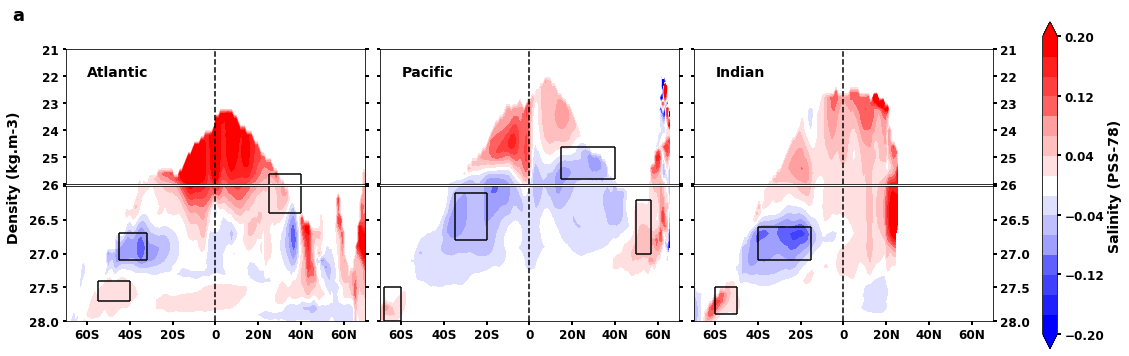

In [13]:
# ===== Plot =====
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,5))

levels = np.linspace(minmax[0], minmax[1], minmax[2])
cmap = custom_div_cmap() # plt.get_cmap('bwr')

cnplot = zonal_2D(plt, 'total_mme', axes[0, 0], axes[1, 0], 'left', var_change.latitude, var_change.lev, varAtl, domrho, cmap, levels, clevsm, clevsm_bold)

cnplot = zonal_2D(plt, 'total_mme', axes[0, 1], axes[1, 1], 'mid', var_change.latitude, var_change.lev, varPac, domrho, cmap, levels, clevsm, clevsm_bold)

cnplot = zonal_2D(plt, 'total_mme', axes[0, 2], axes[1, 2], 'right', var_change.latitude, var_change.lev, varInd, domrho, cmap, levels, clevsm, clevsm_bold)

for ax in axes.ravel().tolist():
    ax.tick_params(axis='both', which='major', labelsize=12)

# -- Plot boxes    
for i in range(3):
    # Southern Ocean subpolar
    axes[1,i].hlines(y=(DW10_boxes[i][2],DW10_boxes[i][3]),xmin=DW10_boxes[i][0],xmax=DW10_boxes[i][1])
    axes[1,i].vlines(x=(DW10_boxes[i][0],DW10_boxes[i][1]),ymin=DW10_boxes[i][2],ymax=DW10_boxes[i][3])
    # SH subtropics
    axes[1,i].hlines(y=(DW10_boxes[i+3][2],DW10_boxes[i+3][3]),xmin=DW10_boxes[i+3][0],xmax=DW10_boxes[i+3][1])
    axes[1,i].vlines(x=(DW10_boxes[i+3][0],DW10_boxes[i+3][1]),ymin=DW10_boxes[i+3][2],ymax=DW10_boxes[i+3][3])
# NH subtropics atlantic
for i in range(2):
    axes[i,0].hlines(y=(DW10_boxes[6][2],DW10_boxes[6][3]),xmin=DW10_boxes[6][0],xmax=DW10_boxes[6][1])
    axes[i,0].vlines(x=(DW10_boxes[6][0],DW10_boxes[6][1]),ymin=DW10_boxes[6][2],ymax=DW10_boxes[6][3])
# NH subtropics pacific
axes[0,1].hlines(y=(DW10_boxes[7][2],DW10_boxes[7][3]),xmin=DW10_boxes[7][0],xmax=DW10_boxes[7][1])
axes[0,1].vlines(x=(DW10_boxes[7][0],DW10_boxes[7][1]),ymin=DW10_boxes[7][2],ymax=DW10_boxes[7][3])
# Subpolar north pacific
axes[1,1].hlines(y=(DW10_boxes[8][2],DW10_boxes[8][3]),xmin=DW10_boxes[8][0],xmax=DW10_boxes[8][1])
axes[1,1].vlines(x=(DW10_boxes[8][0],DW10_boxes[8][1]),ymin=DW10_boxes[8][2],ymax=DW10_boxes[8][3])
    
plt.subplots_adjust(hspace=.012, wspace=0.05, left=0.05, right=0.86)

cb = plt.colorbar(cnplot[0], ax=axes.ravel().tolist(), ticks=levels[::3], fraction=0.015, shrink=2.0, pad=0.05)
cb.set_label('%s (%s)' % (legVar, unit), fontweight='bold',fontsize=14)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontweight='bold')
cb.ax.yaxis.set_tick_params(which='major',width=2, labelsize=12)

name = 'EN4'
plotTitle = 'EN4 1950-2017 trend'
plotName = 'EN4_19502017_trend'
figureDir = 'obs/zonal_ys/'

plt.figtext(.006,.96,'a',fontweight='bold',fontsize=18)

# plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')
plt.figtext(.002,.35,'Density (kg.m-3)',rotation='vertical',horizontalalignment='left',fontweight='bold',fontsize=14)

plt.savefig(plotName+'.png', bbox_inches='tight', dpi=150)